In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metadata = pd.read_table("../data/Metabolome/24_metab_metadata_cleaned.txt", sep='\t', index_col=0)
metadata.head()

,cage_number,timepoint,zt,TP,hours,cycle,collection_timestamp,description,diet,experiment_duration,...,host_subject_id,host_taxid,mouse_number,physical_specimen_location,qiita_study_id,scientific_name,sex,taxon_id,title,treatment
sample-id,,,,,,,,,,,,,,,,,,,,,
A32_133_1B,A32,1,2,one,0,day,12/14/17 8:00,4-8 am collection mouse 133,HFD,6 days,...,Mouse 133,10090.0,133,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf
A32_133_2B,A32,2,6,two,4,day,12/14/17 12:00,8 am-12 pm collection mouse 133,HFD,6 days,...,Mouse 133,10090.0,133,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf
A32_133_3B,A32,3,10,three,8,day,12/14/17 16:00,12 pm-4 pm collection mouse 133,HFD,6 days,...,Mouse 133,10090.0,133,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf
A32_133_4B,A32,4,14,four,12,night,12/14/17 20:00,4 pm-8 pm collection mouse 133,HFD,6 days,...,Mouse 133,10090.0,133,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf
A32_133_5B,A32,5,18,five,16,night,12/15/17 0:00,8 pm-12 am collection mouse 133,HFD,6 days,...,Mouse 133,10090.0,133,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf


In [3]:
from scipy.stats import mannwhitneyu

In [4]:
metabs = pd.read_table("../data/Metabolome/cIHC_allunique_noblanks_Cameron.txt", sep='\t', index_col=0)
metabs.head()

,"(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,7R,8R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,8S,9S,10R,13R,14S,17R)-3,6-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,7R,8R,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,8R,9S,10S,12R,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid",...,TOP19 Psoriasis feature - Unknown FeatureID=3668,Tauro-b-muricholic acid,Taurocholic acid,Taurodeoxycholic acid,Ursodeoxycholic acid,a-Muricholic acid,b-Muricholic acid,sphingosin C16 (Artifact)-emf,taurocholic acid,taurodeoxycholic acid
A25_126_3B,5.480050e+06,6.437782e+05,1.858553e+07,4.178921e+06,6.582005e+07,3.532043e+07,1.127328e+07,1.248584e+08,1.305419e+07,1.070126e+08,...,1.503057e+06,1.625237e+08,2.599281e+07,3.455895e+07,3.972509e+06,7.092763e+07,1.242296e+08,3.261237e+07,8.497497e+06,4.548074e+06
A24_125_2B,4.101638e+06,8.403904e+05,1.586084e+07,1.147595e+06,1.624845e+07,6.083623e+07,1.222513e+07,9.934156e+07,7.802231e+06,1.029225e+08,...,2.647022e+07,2.215389e+07,1.749046e+07,5.642961e+05,3.430368e+06,4.361527e+07,7.462060e+07,3.363955e+07,9.049529e+06,3.488563e+05
A24_125_4B,1.291337e+07,1.404490e+06,1.734975e+07,1.633418e+07,1.959786e+07,2.534828e+08,2.640127e+07,1.455391e+08,1.711117e+07,1.137783e+08,...,9.383566e+07,5.251490e+07,3.598053e+07,2.845528e+06,1.160620e+07,1.834564e+08,2.941944e+08,2.888392e+07,1.070718e+07,6.090329e+05
A25_126_2B,1.245210e+07,3.586830e+05,1.292355e+08,4.639285e+06,7.962184e+07,3.874662e+08,2.261776e+07,8.323042e+07,4.515364e+07,7.955346e+07,...,4.715221e+07,8.250941e+08,8.244562e+07,4.387471e+07,4.642114e+06,1.327039e+08,4.359186e+08,2.983001e+07,5.141652e+07,6.407710e+07
A25_126_1B,2.293774e+07,9.960390e+05,4.048562e+07,9.742128e+06,4.051302e+07,7.512250e+08,2.424713e+07,9.144582e+07,7.044006e+07,8.548808e+07,...,4.027034e+07,8.376709e+07,3.017734e+07,8.541908e+06,1.293260e+07,2.635715e+08,4.708396e+08,2.938015e+07,6.813926e+06,1.696077e+07


In [5]:
tsn_metabs = metabs.div(metabs.sum(axis=1), axis=0)*100
#total sum normalization of all unique moles, no blanks; "relative abundance" percent
tsn_metabs.head()

,"(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,7R,8R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,8S,9S,10R,13R,14S,17R)-3,6-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,7R,8R,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,8R,9S,10S,12R,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid",...,TOP19 Psoriasis feature - Unknown FeatureID=3668,Tauro-b-muricholic acid,Taurocholic acid,Taurodeoxycholic acid,Ursodeoxycholic acid,a-Muricholic acid,b-Muricholic acid,sphingosin C16 (Artifact)-emf,taurocholic acid,taurodeoxycholic acid
A25_126_3B,0.017948,0.002108,0.060870,0.013687,0.215569,0.115679,0.036921,0.408928,0.042754,0.350481,...,0.004923,0.532287,0.085130,0.113185,0.013010,0.232297,0.406869,0.106810,0.027830,0.014896
A24_125_2B,0.016310,0.003342,0.063068,0.004563,0.064609,0.241906,0.048611,0.395016,0.031024,0.409256,...,0.105255,0.088092,0.069548,0.002244,0.013640,0.173429,0.296717,0.133762,0.035984,0.001387
A24_125_4B,0.032289,0.003512,0.043381,0.040842,0.049003,0.633809,0.066014,0.363906,0.042785,0.284491,...,0.234627,0.131308,0.089966,0.007115,0.029020,0.458715,0.735604,0.072221,0.026772,0.001523
A25_126_2B,0.028019,0.000807,0.290796,0.010439,0.179159,0.871847,0.050893,0.187279,0.101601,0.179005,...,0.106098,1.856565,0.185513,0.098724,0.010445,0.298600,0.980871,0.067121,0.115694,0.144181
A25_126_1B,0.047631,0.002068,0.084070,0.020230,0.084127,1.559944,0.050350,0.189890,0.146271,0.177519,...,0.083623,0.173945,0.062664,0.017738,0.026855,0.547315,0.977714,0.061009,0.014149,0.035220


In [6]:
metabs_merged = pd.merge(tsn_metabs, metadata, left_index=True, right_index=True)
metabs_merged.head()

,"(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,7R,8R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,8S,9S,10R,13R,14S,17R)-3,6-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,7R,8R,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,8R,9S,10S,12R,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid",...,host_subject_id,host_taxid,mouse_number,physical_specimen_location,qiita_study_id,scientific_name,sex,taxon_id,title,treatment
A25_126_3B,0.017948,0.002108,0.060870,0.013687,0.215569,0.115679,0.036921,0.408928,0.042754,0.350481,...,Mouse 126,10090.0,126,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber
A24_125_2B,0.016310,0.003342,0.063068,0.004563,0.064609,0.241906,0.048611,0.395016,0.031024,0.409256,...,Mouse 125,10090.0,125,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber
A24_125_4B,0.032289,0.003512,0.043381,0.040842,0.049003,0.633809,0.066014,0.363906,0.042785,0.284491,...,Mouse 125,10090.0,125,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber
A25_126_2B,0.028019,0.000807,0.290796,0.010439,0.179159,0.871847,0.050893,0.187279,0.101601,0.179005,...,Mouse 126,10090.0,126,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber
A25_126_1B,0.047631,0.002068,0.084070,0.020230,0.084127,1.559944,0.050350,0.189890,0.146271,0.177519,...,Mouse 126,10090.0,126,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber


In [7]:
metabs_merged["both"] = metabs_merged["exposure_type"].astype(str) + "_" + metabs_merged["timepoint"].astype(str)

In [8]:
fn = lambda row: row.timepoint + 6 # define a function for the new column
col = metabs_merged.apply(fn, axis=1) # get column data with an index
metabs_merged = metabs_merged.assign(new_tp=col.values) # assign values to column 'new'
metabs_merged.head()

,"(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,7R,8R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,8S,9S,10R,13R,14S,17R)-3,6-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,7R,8R,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,8R,9S,10S,12R,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid",...,host_taxid,mouse_number,physical_specimen_location,qiita_study_id,scientific_name,sex,taxon_id,title,treatment,new_tp
A25_126_3B,0.017948,0.002108,0.060870,0.013687,0.215569,0.115679,0.036921,0.408928,0.042754,0.350481,...,10090.0,126,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber,9
A24_125_2B,0.016310,0.003342,0.063068,0.004563,0.064609,0.241906,0.048611,0.395016,0.031024,0.409256,...,10090.0,125,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber,8
A24_125_4B,0.032289,0.003512,0.043381,0.040842,0.049003,0.633809,0.066014,0.363906,0.042785,0.284491,...,10090.0,125,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber,10
A25_126_2B,0.028019,0.000807,0.290796,0.010439,0.179159,0.871847,0.050893,0.187279,0.101601,0.179005,...,10090.0,126,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber,8
A25_126_1B,0.047631,0.002068,0.084070,0.020230,0.084127,1.559944,0.050350,0.189890,0.146271,0.177519,...,10090.0,126,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber,7


In [9]:
metabs_merged["new_both"] = metabs_merged["exposure_type"].astype(str) + "_" + metabs_merged["new_tp"].astype(str)
metabs_merged.head()

,"(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,7R,8R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,8S,9S,10R,13R,14S,17R)-3,6-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,7R,8R,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,8R,9S,10S,12R,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid",...,mouse_number,physical_specimen_location,qiita_study_id,scientific_name,sex,taxon_id,title,treatment,new_tp,new_both
A25_126_3B,0.017948,0.002108,0.060870,0.013687,0.215569,0.115679,0.036921,0.408928,0.042754,0.350481,...,126,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber,9,IHC_9
A24_125_2B,0.016310,0.003342,0.063068,0.004563,0.064609,0.241906,0.048611,0.395016,0.031024,0.409256,...,125,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber,8,IHC_8
A24_125_4B,0.032289,0.003512,0.043381,0.040842,0.049003,0.633809,0.066014,0.363906,0.042785,0.284491,...,125,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber,10,IHC_10
A25_126_2B,0.028019,0.000807,0.290796,0.010439,0.179159,0.871847,0.050893,0.187279,0.101601,0.179005,...,126,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber,8,IHC_8
A25_126_1B,0.047631,0.002068,0.084070,0.020230,0.084127,1.559944,0.050350,0.189890,0.146271,0.177519,...,126,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber,7,IHC_7


In [10]:
#metabs_merged.to_csv("../data/Metabolome/doubleplots.txt", sep='\t')

In [11]:
#manually copied data and named condition_timepoint(7-12)

In [12]:
metab_dp = pd.read_csv("../data/Metabolome/doubleplots.txt", sep='\t', index_col=0)
metab_dp.head()

,"(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,7R,8R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,8S,9S,10R,13R,14S,17R)-3,6-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,7R,8R,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,8R,9S,10S,12R,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid",...,host_subject_id,host_taxid,mouse_number,physical_specimen_location,qiita_study_id,scientific_name,sex,taxon_id,title,treatment
A25_126_3B,0.017948,0.002108,0.060870,0.013687,0.215569,0.115679,0.036921,0.408928,0.042754,0.350481,...,Mouse 126,10090,126,UCSDMI,11548,mouse gut metagenome,male,410661,IHC CR,In chamber
A24_125_2B,0.016310,0.003342,0.063068,0.004563,0.064609,0.241906,0.048611,0.395016,0.031024,0.409256,...,Mouse 125,10090,125,UCSDMI,11548,mouse gut metagenome,male,410661,IHC CR,In chamber
A24_125_4B,0.032289,0.003512,0.043381,0.040842,0.049003,0.633809,0.066014,0.363906,0.042785,0.284491,...,Mouse 125,10090,125,UCSDMI,11548,mouse gut metagenome,male,410661,IHC CR,In chamber
A25_126_2B,0.028019,0.000807,0.290796,0.010439,0.179159,0.871847,0.050893,0.187279,0.101601,0.179005,...,Mouse 126,10090,126,UCSDMI,11548,mouse gut metagenome,male,410661,IHC CR,In chamber
A25_126_1B,0.047631,0.002068,0.084070,0.020230,0.084127,1.559944,0.050350,0.189890,0.146271,0.177519,...,Mouse 126,10090,126,UCSDMI,11548,mouse gut metagenome,male,410661,IHC CR,In chamber


In [13]:
import matplotlib.patches as patches

# Bile Acid Double Plots

In [14]:
metab_dp = metab_dp.rename(columns={'(R)-4-((3R,5R,6R,8S,9S,10R,13R,14S,17R)-3,6-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid':'murocholic acid', 
                                   '(4R)-4-((3R,5R,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': 'CDCA'})

In [15]:
bile_acids = ['Deoxycholic acid', 'Tauro-b-muricholic acid', 'Ursodeoxycholic acid', 'Cholic acid',
              'Hyodeoxycholic acid', 'CDCA']

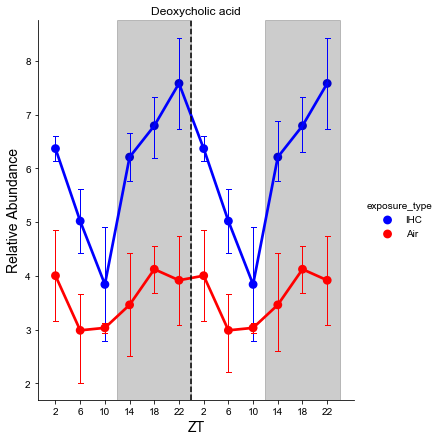

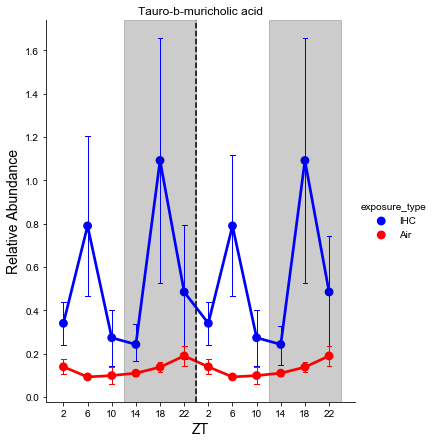

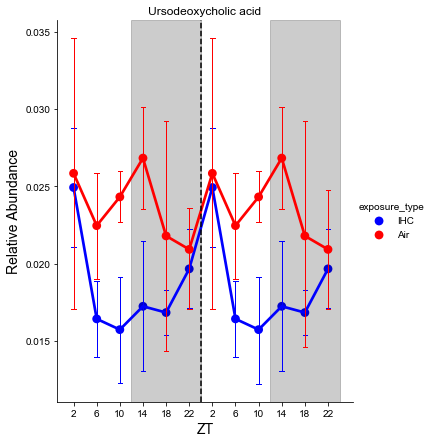

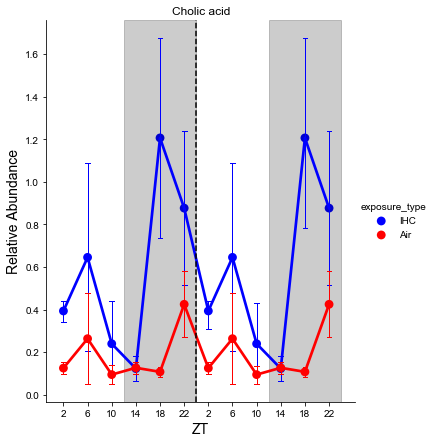

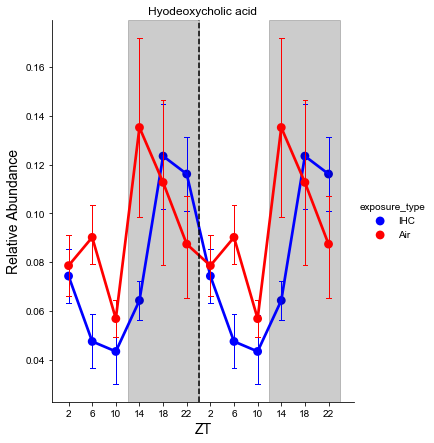

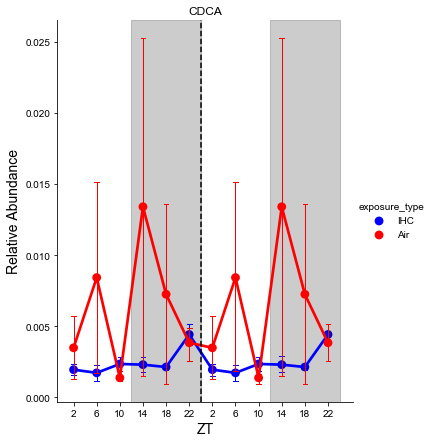

In [16]:
for BA in bile_acids:
    g = sns.catplot(x="timepoint", y=BA,
                hue="exposure_type", capsize=.2, palette=['blue', 'red'], ci=68,
                height=6, aspect=.85, kind="point", errwidth=1, data=metab_dp)

    plt.axvspan(2.5, 5.5, alpha=0.2, color='black')
    plt.axvspan(8.5, 11.5, alpha=0.2, color='black')
    plt.axvline(x=5.5, color='k', linestyle='--')
    plt.title(BA)
    plt.ylabel('Relative Abundance', fontsize=14)
    plt.xlabel('ZT', fontsize=14)
    plt.xticks(np.arange(12), ('2', '6', '10', '14', '18', '22', '2', '6', '10', '14', '18', '22'))
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/cIHC_BA_double_%s_SEM.svg' % BA, dpi=300, bbox_inches = "tight")
    plt.show()

In [17]:
from itertools import combinations

In [18]:
#Individual TP significance
for BA in bile_acids:
    FM = metab_dp[[BA, 'exposure_type', 'timepoint']].copy()
    print(BA)
    for cyc in metabs_merged.timepoint.unique():
        TP = FM[FM["timepoint"] == cyc]
        p = TP[TP['exposure_type'] == 'Air']
        q = TP[TP['exposure_type'] == 'IHC']
        x1 = p[BA].values
        y1 = q[BA].values
        w1, z1 = mannwhitneyu(x1, y1)
        print("phase", cyc, "- Air vs IHC")
        print("p-value", z1)
        print("- - - - - - - - - - - - - - ")
    print("____________________________________________")

Deoxycholic acid
phase 3 - Air vs IHC
p-value 0.3312602917700287
- - - - - - - - - - - - - - 
phase 2 - Air vs IHC
p-value 0.056175598845231926
- - - - - - - - - - - - - - 
phase 4 - Air vs IHC
p-value 0.015191410988288745
- - - - - - - - - - - - - - 
phase 1 - Air vs IHC
p-value 0.030300984856003035
- - - - - - - - - - - - - - 
phase 5 - Air vs IHC
p-value 0.030300984856003035
- - - - - - - - - - - - - - 
phase 6 - Air vs IHC
p-value 0.056175598845231926
- - - - - - - - - - - - - - 
____________________________________________
Tauro-b-muricholic acid
phase 3 - Air vs IHC
p-value 0.19136654444261297
- - - - - - - - - - - - - - 
phase 2 - Air vs IHC
p-value 0.056175598845231926
- - - - - - - - - - - - - - 
phase 4 - Air vs IHC
p-value 0.33250277105101456
- - - - - - - - - - - - - - 
phase 1 - Air vs IHC
p-value 0.056175598845231926
- - - - - - - - - - - - - - 
phase 5 - Air vs IHC
p-value 0.09696542614120535
- - - - - - - - - - - - - - 
phase 6 - Air vs IHC
p-value 0.44261695723660077
-

In [19]:
from scipy.stats import wilcoxon
#Individual TP significance, Wilcoxon
for BA in bile_acids:
    FM = metab_dp[[BA, 'exposure_type', 'timepoint']].copy()
    print(BA)
    for cyc in metabs_merged.timepoint.unique():
        TP = FM[FM["timepoint"] == cyc]
        p = TP[TP['exposure_type'] == 'Air']
        q = TP[TP['exposure_type'] == 'IHC']
        x1 = p[BA].values
        y1 = q[BA].values
        if len(x1) == len(y1):
            w1, z1 = wilcoxon(x1, y1)
            print("phase", cyc, "- Air vs IHC")
            print("p-value", z1)
            print("- - - - - - - - - - - - - - ")
    print("____________________________________________")

Deoxycholic acid
phase 3 - Air vs IHC
p-value 0.28504940740261275
- - - - - - - - - - - - - - 
phase 2 - Air vs IHC
p-value 0.27332167829229814
- - - - - - - - - - - - - - 
phase 4 - Air vs IHC
p-value 0.06788915486182899
- - - - - - - - - - - - - - 
phase 1 - Air vs IHC
p-value 0.06788915486182899
- - - - - - - - - - - - - - 
phase 5 - Air vs IHC
p-value 0.06788915486182899
- - - - - - - - - - - - - - 
phase 6 - Air vs IHC
p-value 0.14412703481601533
- - - - - - - - - - - - - - 
____________________________________________
Tauro-b-muricholic acid
phase 3 - Air vs IHC
p-value 0.28504940740261275
- - - - - - - - - - - - - - 
phase 2 - Air vs IHC
p-value 0.14412703481601533
- - - - - - - - - - - - - - 
phase 4 - Air vs IHC
p-value 0.14412703481601533
- - - - - - - - - - - - - - 
phase 1 - Air vs IHC
p-value 0.06788915486182899
- - - - - - - - - - - - - - 
phase 5 - Air vs IHC
p-value 0.06788915486182899
- - - - - - - - - - - - - - 
phase 6 - Air vs IHC
p-value 0.4652088184521418
- - - - 

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Bile Acid boxplots

In [20]:
metabs_merged = metabs_merged.rename(columns={'(R)-4-((3R,5R,6R,8S,9S,10R,13R,14S,17R)-3,6-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid':'murocholic acid', 
                                             '(4R)-4-((3R,5R,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': 'CDCA'})

In [21]:
metabs_merged.sort_values(by=['cycle', 'exposure_type'], ascending=True, inplace=True)

In [22]:
metabs_merged.cycle.unique()

array(['day', 'night'], dtype=object)

In [23]:
metabs_merged.exposure_type.unique()

array(['Air', 'IHC'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.080e-04 U_stat=9.000e+00
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.512e-02 U_stat=2.300e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=4.417e-01 U_stat=5.300e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=2.890e-02 U_stat=3.000e+01


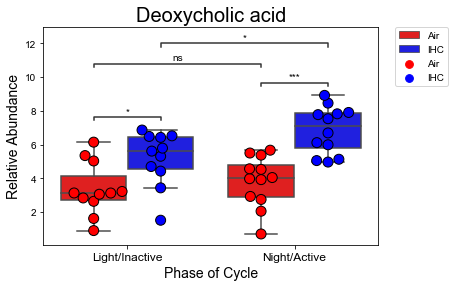

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.260e-01 U_stat=4.500e+01
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.861e-03 U_stat=1.600e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=2.815e-01 U_stat=4.800e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=6.009e-01 U_stat=7.500e+01


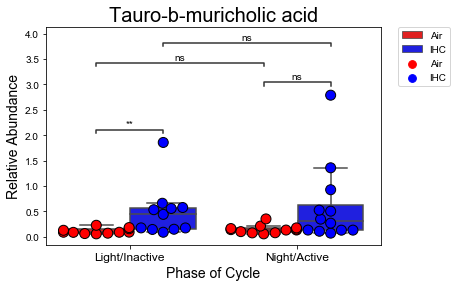

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.939e-01 U_stat=9.500e+01
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=2.934e-01 U_stat=7.700e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=9.755e-01 U_stat=6.600e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=6.891e-01 U_stat=7.300e+01


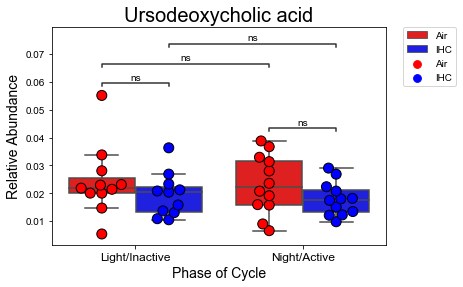

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.410e-01 U_stat=4.600e+01
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=4.884e-02 U_stat=3.000e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=3.722e-01 U_stat=5.100e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=8.777e-01 U_stat=6.300e+01


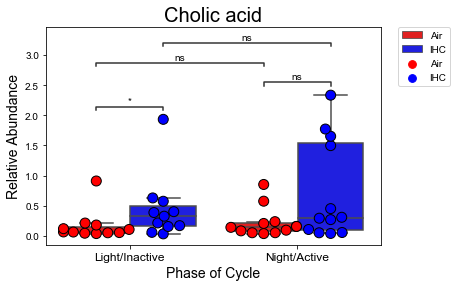

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=9.770e-01 U_stat=7.100e+01
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.891e-01 U_stat=8.100e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=2.071e-01 U_stat=4.500e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=2.100e-02 U_stat=2.800e+01


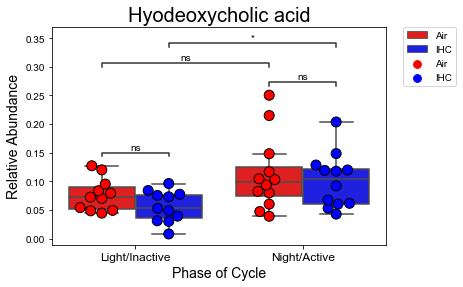

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=5.444e-01 U_stat=6.100e+01
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=7.427e-01 U_stat=5.500e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=4.417e-01 U_stat=5.300e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=7.942e-02 U_stat=3.700e+01


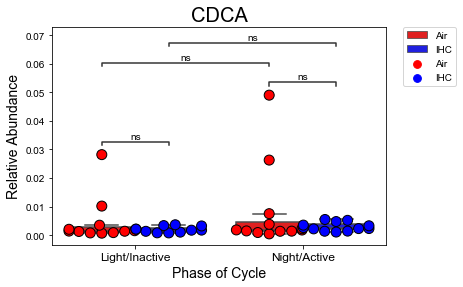

In [24]:
for BA in bile_acids:
    g = sns.boxplot(x="cycle", y=BA, hue="exposure_type", 
                    palette=['red', 'blue' ], data=metabs_merged)
    g = sns.swarmplot(x="cycle", y=BA, dodge=True, s=10, linewidth=1, edgecolor='k', 
                hue="exposure_type", palette=['red', 'blue'], data=metabs_merged)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    add_stat_annotation(g, data=metabs_merged, x='cycle', y=BA, hue="exposure_type", order=["day", "night"], 
                    box_pairs=[(('day', "Air"), ('day', "IHC")), 
                               (('night', "Air"), ('night', "IHC")), 
                               (('day', "Air"), ('night', "Air")), 
                               (('day', "IHC"), ('night', "IHC"))],
                    test='Mann-Whitney', text_format='star', loc='inside')
    plt.title(BA, fontsize=20)
    plt.ylabel('Relative Abundance', fontsize=14)
    plt.xlabel('Phase of Cycle', fontsize=14)
    plt.xticks(np.arange(2), ('Light/Inactive', 'Night/Active'), fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('../figures/cIHC_BA_box_%s.svg' % BA, dpi=300, bbox_inches = "tight")
    plt.show()

In [25]:
for BA in bile_acids:
    FM = metabs_merged[[BA, 'exposure_type', 'cycle']].copy()
    print(BA)
    for cyc in metabs_merged.cycle.unique():
        TP = FM[FM["cycle"] == cyc]
        p = TP[TP['exposure_type'] == 'Air']
        q = TP[TP['exposure_type'] == 'IHC']
        x1 = p[BA].values
        y1 = q[BA].values
        w1, z1 = mannwhitneyu(x1, y1)
        print("phase", cyc, "- Air vs IHC")
        print("p-value", z1)
    for exp in metabs_merged.exposure_type.unique():
        EP = FM[FM["exposure_type"] == exp]
        r = EP[EP['cycle'] == 'day']
        s = EP[EP['cycle'] == 'night']
        x2 = r[BA].values
        y2 = s[BA].values
        w2, z2 = mannwhitneyu(x2, y2)
        print("exposure type", exp, "-day vs night")
        print("p-value", z2)
    print("___________________________")

Deoxycholic acid
phase day - Air vs IHC
p-value 0.007557634678246729
phase night - Air vs IHC
p-value 0.00015402235281387344
exposure type Air -day vs night
p-value 0.2208511438953002
exposure type IHC -day vs night
p-value 0.014449044462181924
___________________________
Tauro-b-muricholic acid
phase day - Air vs IHC
p-value 0.0019307453316667101
phase night - Air vs IHC
p-value 0.06301106088518654
exposure type Air -day vs night
p-value 0.14072884242231082
exposure type IHC -day vs night
p-value 0.3004388204772394
___________________________
Ursodeoxycholic acid
phase day - Air vs IHC
p-value 0.14671194163710516
phase night - Air vs IHC
p-value 0.09696542614120535
exposure type Air -day vs night
p-value 0.48772533729217893
exposure type IHC -day vs night
p-value 0.34456082255352616
___________________________
Cholic acid
phase day - Air vs IHC
p-value 0.024422032087137134
phase night - Air vs IHC
p-value 0.07047760957218573
exposure type Air -day vs night
p-value 0.18608571989106287


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_Air v.s. 6_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.123e-01 U_stat=1.200e+01
2_Air v.s. 2_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=8.852e-01 U_stat=7.000e+00
10_Air v.s. 10_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.827e-01 U_stat=7.000e+00
14_Air v.s. 14_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.939e-01 U_stat=1.300e+01
18_Air v.s. 18_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=8.852e-01 U_stat=8.000e+00
22_Air v.s. 22_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=8.852e-01 U_stat=8.000e+00


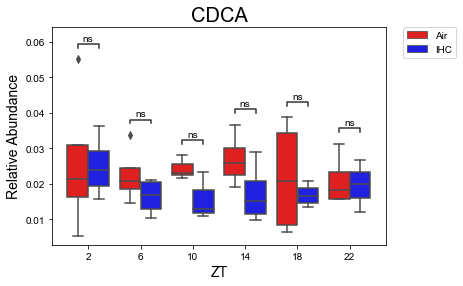

In [44]:
g = sns.boxplot(x="zt", y='Ursodeoxycholic acid', hue="exposure_type", 
                    palette=['red', 'blue' ], data=metabs_merged)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
add_stat_annotation(g, data=metabs_merged, x="zt", y='Ursodeoxycholic acid', hue="exposure_type", hue_order=["Air", "IHC"], 
                    box_pairs=[((2, "Air"), (2, "IHC")), 
                               ((6, "Air"), (6, "IHC")), 
                               ((10, "Air"), (10, "IHC")), 
                               ((14, "Air"), (14, "IHC")), 
                               ((18, "Air"), (18, "IHC")), 
                               ((22, "Air"), (22, "IHC"))],
                    test='Mann-Whitney', text_format='star', loc='inside')
plt.title(BA, fontsize=20)
plt.ylabel('Relative Abundance', fontsize=14)
plt.xlabel('ZT', fontsize=14)
#plt.xticks(np.arange(2), ('Light/Inactive', 'Night/Active'), fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/cIHC_BA_box_%s.svg' % BA, dpi=300, bbox_inches = "tight")
plt.show()

# Other Double Plots

In [27]:
metab_dp_ppc = metab_dp.rename(columns={'Spectral Match to Palmitoylcarnitine from NIST14': "Palmitoylcarnitine", 
                                       'Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': "16:0_LysoPE", 
                                        'Spectral Match to 1-Heptadecanoyl-sn-glycero-3-phosphocholine from NIST14': "PC_17:1_0:0", 
                                       'Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18:1-9Z_0:0',
                                       '(R)-4-((3R,5R,6R,7R,8R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': '(3α,5β,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid', 
                                       'Spectral Match to 1-Stearoyl-2-myristoyl-sn-glycero-3-phosphocholine from NIST14': 'PC_18:0_14:0', 
                                       'DIDECANOYL-GLYCEROPHOSPHOCHOLINE': 'PC_10:0_10:0', 
                                       'Spectral Match to 1-(1Z-Hexadecenyl)-sn-glycero-3-phosphocholine from NIST14': 'LPC_P-16:0', 
                                       'Spectral Match to Oleoyl L-carnitine from NIST14': 'Oleoyl_L-carnitine', 
                                       'Spectral Match to 1-Hexadecyl-2-(9Z-octadecenoyl)-sn-glycero-3-phosphocholine from NIST14': 'PC_O-16:0_18:1', 
                                       'Spectral Match to Arachidonoylthio-PC from NIST14': 'Arachidonoyl_Thio-PC', 
                                        '(R)-4-((3R,5S,8R,9S,10S,12R,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': '(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid', 
                                        '(R)-4-((3R,5R,6R,8S,9S,10R,13R,14S,17R)-3,6-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': 'murocholic acid', 
                                        'Spectral Match to 1-(1Z-Hexadecenyl)-sn-glycero-3-phosphocholine from NIST14': 'LPC_P-16:0', 
                                        'PC(O-16:0/18:2); [M+H]+ C42H83N1O7P1': 'LPC_O-16:0', 
                                       'Spectral Match to Arachidonoylthio-PC from NIST14': 'Arachidonoylthio-PC', 
                                       'Spectral Match to Elaidic acid from NIST14': 'Elaidic acid', 
                                       'Spectral Match to (+)-.alpha.-Tocopherol from NIST14': 'Vitamin E', 
                                       'Spectral Match to Urobilin from NIST14': 'Urobilin'})

In [28]:
other_mols = ["Palmitoylcarnitine", 'Oleoyl_L-carnitine', "16:0_LysoPE", 'LysoPE_18:1-9Z_0:0', 
              'PC_18:0_14:0', 'PC_10:0_10:0', 'LPC_P-16:0', 'PC_O-16:0_18:1', "PC_17:1_0:0",
              'LPC_P-16:0', 'LPC_O-16:0', '(3α,5β,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid', 
              '(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid', 'murocholic acid', 'Arachidonoylthio-PC', 
              'Elaidic acid', 'Vitamin E', 'Urobilin', 'Stercobilin']

In [29]:
metab_dp_ppc.sort_values('exposure_type', ascending=True, inplace=True)

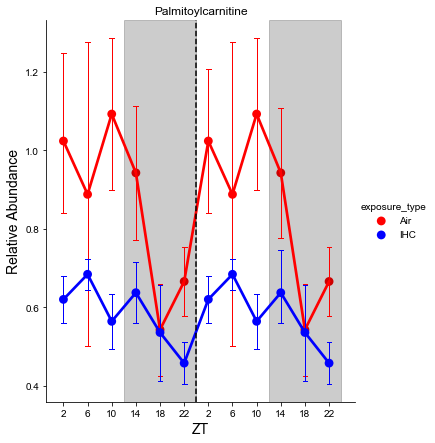

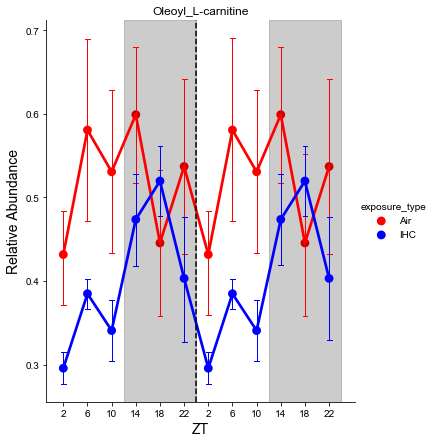

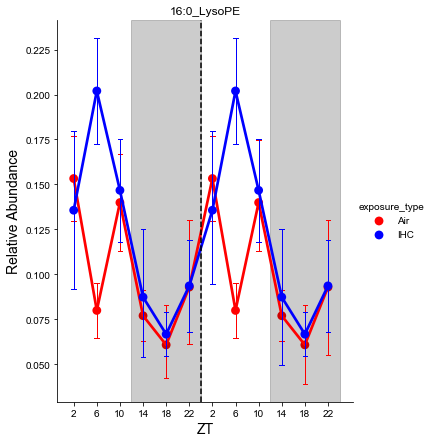

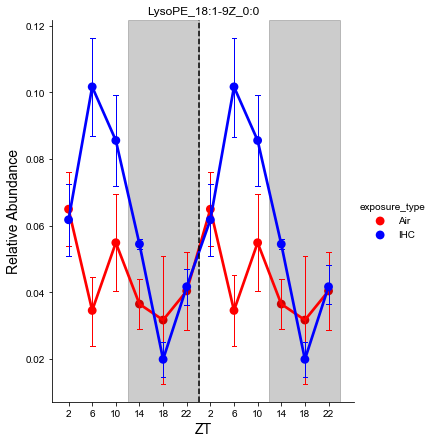

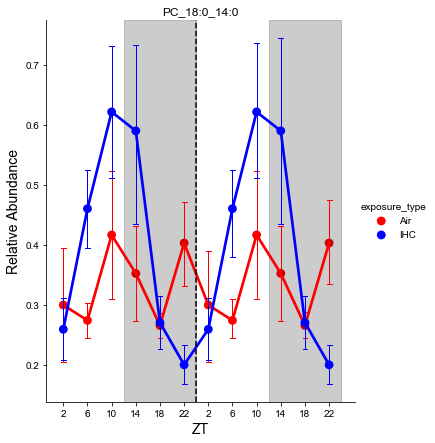

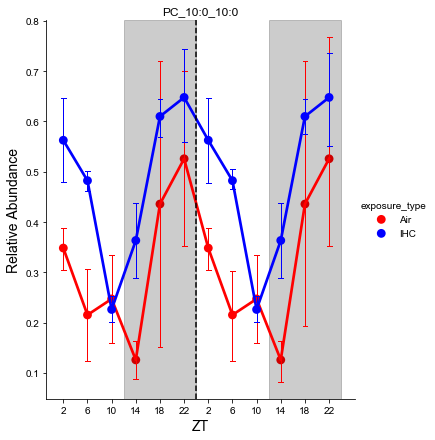

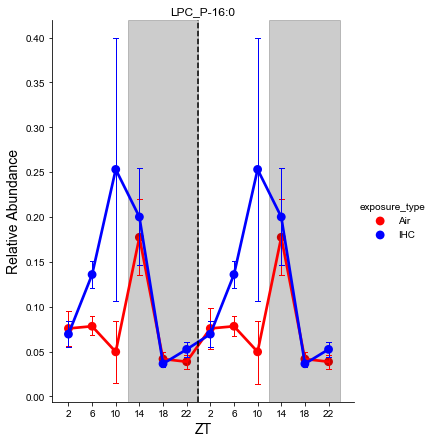

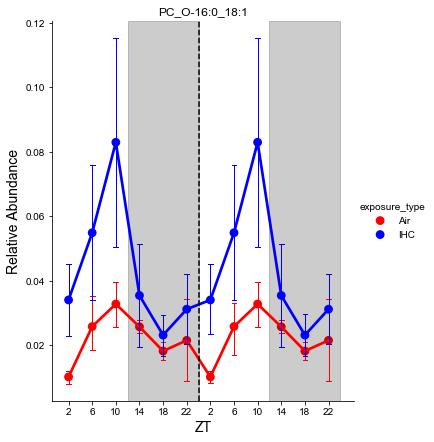

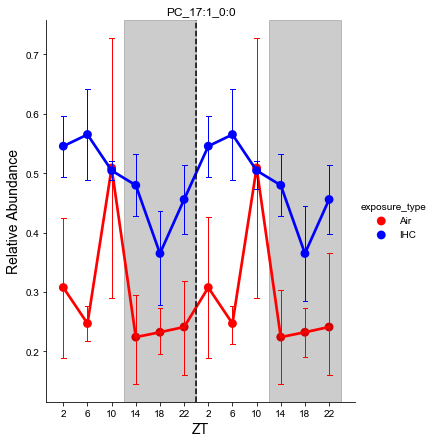

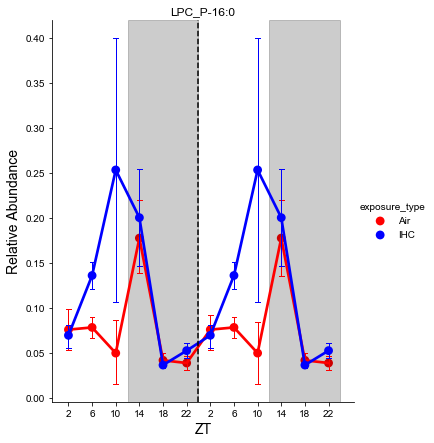

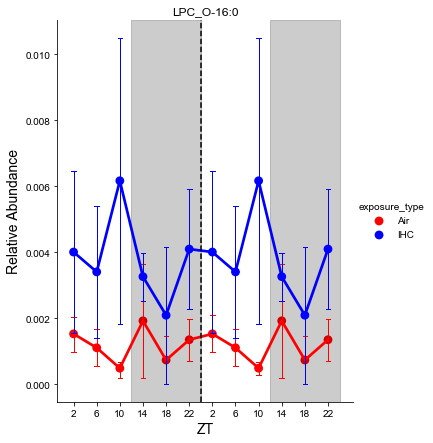

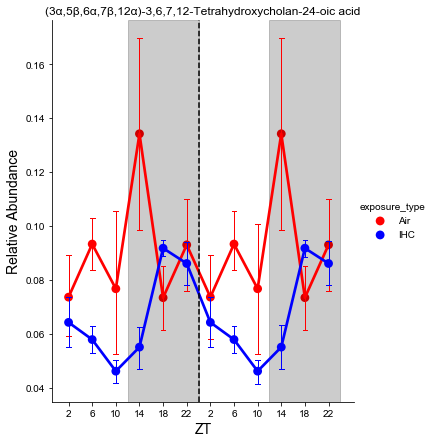

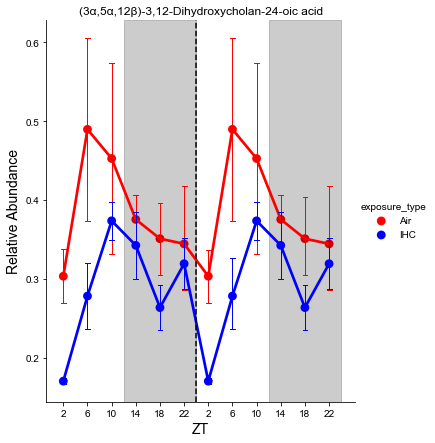

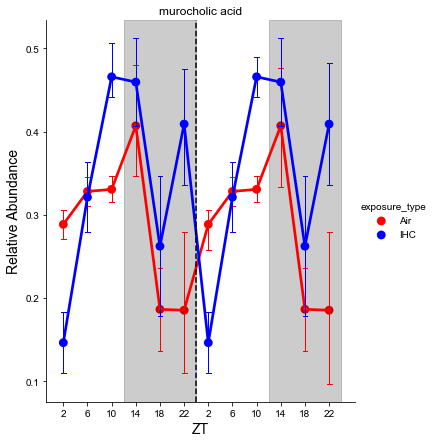

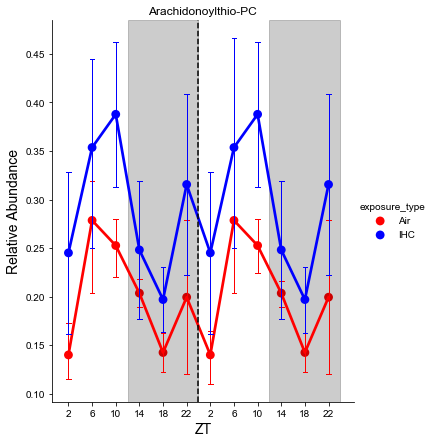

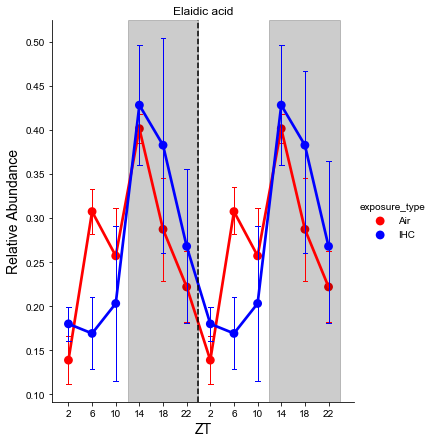

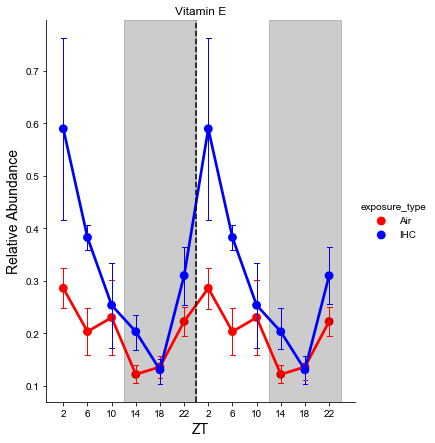

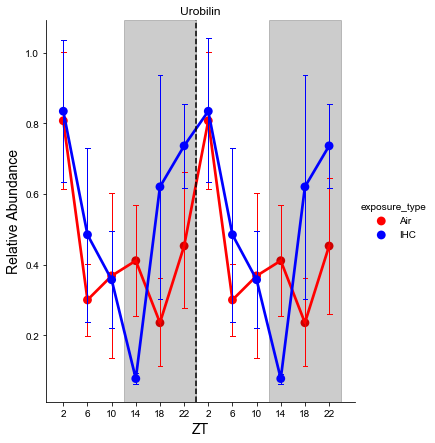

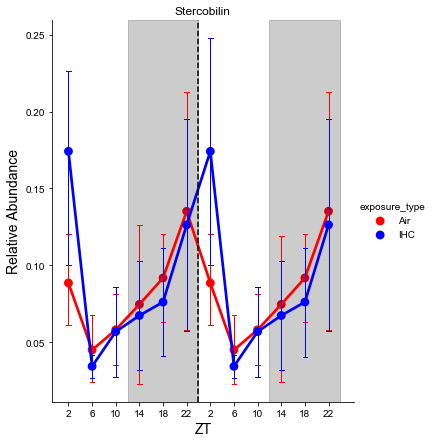

In [30]:
for ppc in other_mols:
    g = sns.catplot(x="timepoint", y=ppc,
                hue="exposure_type", capsize=.2, palette=['red', 'blue'], ci=68,
                height=6, aspect=.85, kind="point", errwidth=1, data=metab_dp_ppc)

    plt.axvspan(2.5, 5.5, alpha=0.2, color='black')
    plt.axvspan(8.5, 11.5, alpha=0.2, color='black')
    plt.axvline(x=5.5, color='k', linestyle='--')
    plt.title(ppc)
    plt.ylabel('Relative Abundance', fontsize=14)
    plt.xlabel('ZT', fontsize=14)
    plt.xticks(np.arange(12), ('2', '6', '10', '14', '18', '22', '2', '6', '10', '14', '18', '22'))
    plt.savefig('../figures/cIHC_ppc_double_%s_SEM.svg' % ppc, dpi=300, bbox_inches = "tight")
    plt.show()

# Other boxplots

In [31]:
metab_dp.sort_values(by=['cycle', 'exposure_type'], ascending=True, inplace=True)

In [32]:
metab_renamed2 = metab_dp.rename(columns={'Spectral Match to Palmitoylcarnitine from NIST14': "Palmitoylcarnitine", 
                                       'Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': "16:0_LysoPE", 
                                        'Spectral Match to 1-Heptadecanoyl-sn-glycero-3-phosphocholine from NIST14': "PC_17:1_0:0", 
                                       'Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18:1-9Z_0:0',
                                       '(R)-4-((3R,5R,6R,7R,8R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': '(3α,5β,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid', 
                                       'Spectral Match to 1-Stearoyl-2-myristoyl-sn-glycero-3-phosphocholine from NIST14': 'PC_18:0_14:0', 
                                       'DIDECANOYL-GLYCEROPHOSPHOCHOLINE': 'PC_10:0_10:0', 
                                       'Spectral Match to 1-(1Z-Hexadecenyl)-sn-glycero-3-phosphocholine from NIST14': 'LPC_P-16:0', 
                                       'Spectral Match to Oleoyl L-carnitine from NIST14': 'Oleoyl_L-carnitine', 
                                       'Spectral Match to 1-Hexadecyl-2-(9Z-octadecenoyl)-sn-glycero-3-phosphocholine from NIST14': 'PC_O-16:0_18:1', 
                                       'Spectral Match to Arachidonoylthio-PC from NIST14': 'Arachidonoyl_Thio-PC', 
                                              '(R)-4-((3R,5S,8R,9S,10S,12R,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': '(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid', 
                                              '(R)-4-((3R,5R,6R,8S,9S,10R,13R,14S,17R)-3,6-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': 'murocholic acid', 
                                              'Spectral Match to 1-(1Z-Hexadecenyl)-sn-glycero-3-phosphocholine from NIST14': 'LPC_P-16:0', 
                                              'PC(O-16:0/18:2); [M+H]+ C42H83N1O7P1': 'LPC_O-16:0', 
                                         'Spectral Match to Arachidonoylthio-PC from NIST14': 'Arachidonoylthio-PC', 
                                         '(4R)-4-((3R,5R,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': 'CDCA', 
                                         'Spectral Match to Elaidic acid from NIST14': 'Elaidic acid', 
                                         'Spectral Match to (+)-.alpha.-Tocopherol from NIST14': 'Vitamin E', 
                                         'Spectral Match to Urobilin from NIST14': 'Urobilin'})

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.717e-02 U_stat=4.040e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.320e-02 U_stat=3.480e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=6.614e-02 U_stat=3.480e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.156e-01 U_stat=3.360e+02


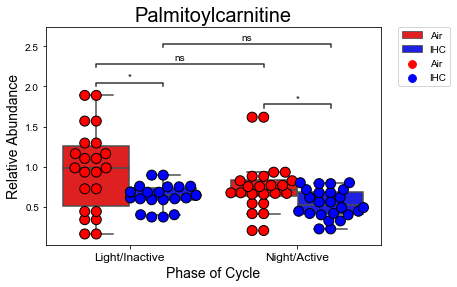

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.901e-01 U_stat=3.520e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.197e-03 U_stat=3.680e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=9.663e-02 U_stat=3.400e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=8.002e-01 U_stat=2.760e+02


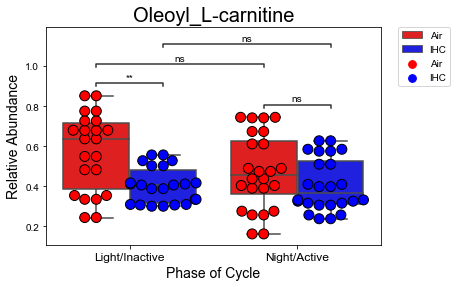

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=9.424e-01 U_stat=2.920e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=2.806e-02 U_stat=1.480e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=9.386e-01 U_stat=2.600e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.559e-02 U_stat=3.600e+02


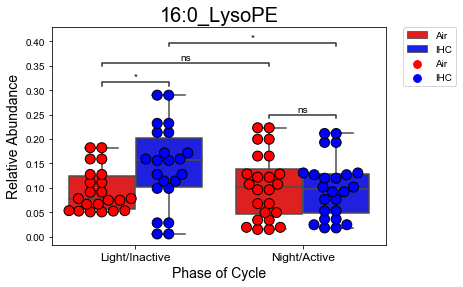

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=8.124e-01 U_stat=3.000e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.484e-04 U_stat=8.000e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=8.002e-01 U_stat=2.520e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.691e-05 U_stat=4.520e+02


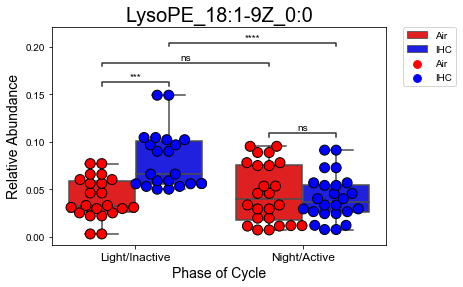

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.193e-01 U_stat=3.640e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.197e-03 U_stat=1.160e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=4.882e-01 U_stat=2.960e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=7.530e-06 U_stat=4.680e+02


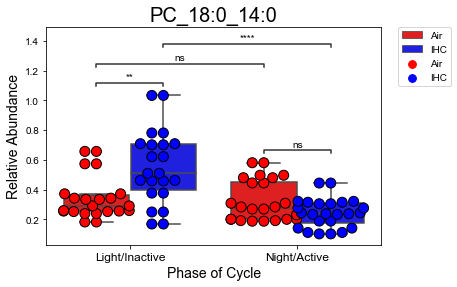

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.773e-03 U_stat=1.360e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.012e-04 U_stat=7.600e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=1.414e-02 U_stat=1.520e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.253e-06 U_stat=5.200e+01


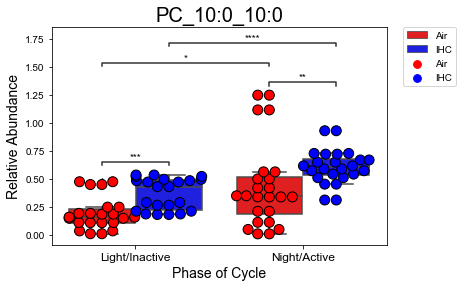

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=7.491e-01 U_stat=2.720e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.320e-02 U_stat=1.360e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=6.574e-03 U_stat=3.880e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=8.732e-07 U_stat=4.880e+02


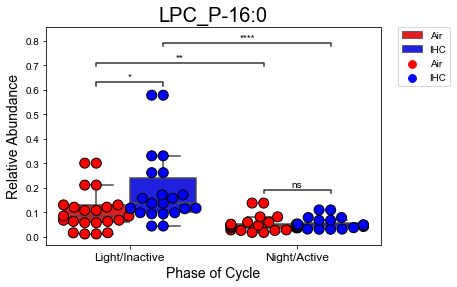

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=4.007e-02 U_stat=1.880e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=2.200e-02 U_stat=1.440e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=1.590e-03 U_stat=4.080e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=6.614e-02 U_stat=3.480e+02


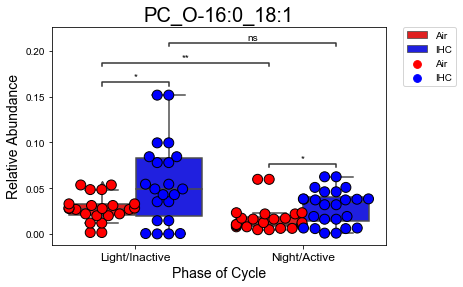

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=4.023e-04 U_stat=1.160e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=4.449e-04 U_stat=9.200e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=5.451e-01 U_stat=2.920e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.374e-01 U_stat=3.320e+02


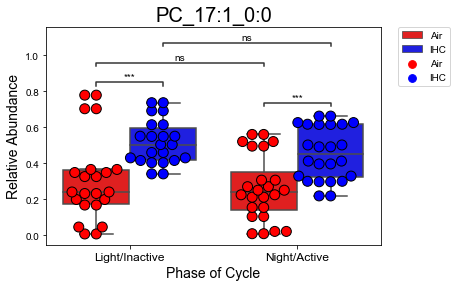

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=7.491e-01 U_stat=2.720e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.320e-02 U_stat=1.360e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=6.574e-03 U_stat=3.880e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=8.732e-07 U_stat=4.880e+02


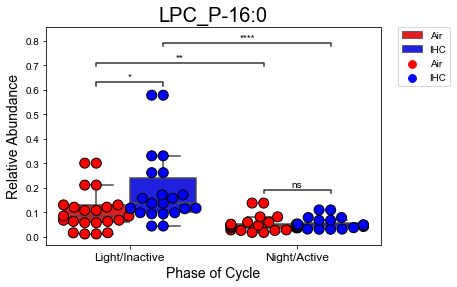

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=9.834e-02 U_stat=2.080e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.985e-04 U_stat=8.400e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=3.701e-01 U_stat=2.240e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.155e-01 U_stat=3.360e+02


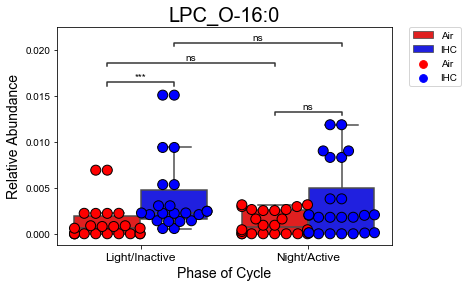

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=5.704e-01 U_stat=2.600e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=6.842e-05 U_stat=4.120e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=8.021e-02 U_stat=3.440e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.692e-05 U_stat=6.800e+01


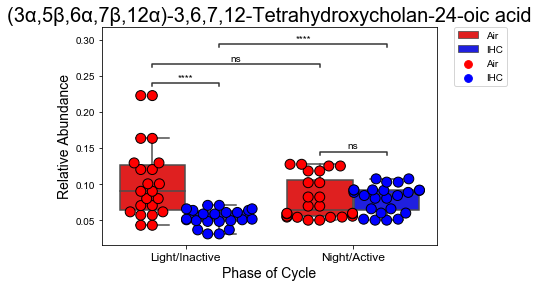

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=5.177e-03 U_stat=4.240e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=4.459e-02 U_stat=3.280e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=6.614e-02 U_stat=3.480e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=2.866e-03 U_stat=4.000e+02


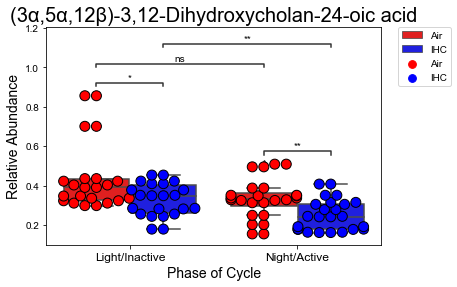

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=4.151e-01 U_stat=2.480e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.320e-02 U_stat=1.360e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=2.279e-04 U_stat=4.320e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.414e-02 U_stat=3.760e+02


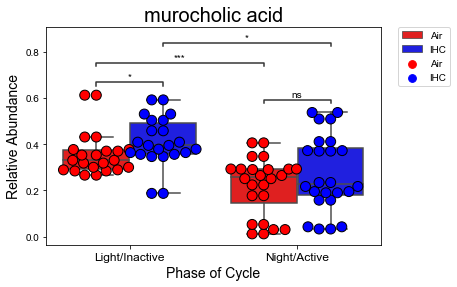

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.083e-02 U_stat=1.640e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=8.424e-02 U_stat=1.680e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=1.125e-04 U_stat=4.400e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=2.220e-01 U_stat=3.200e+02


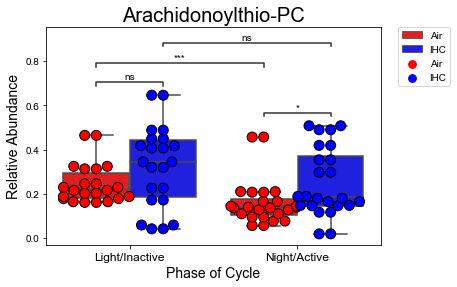

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=4.639e-01 U_stat=2.520e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=8.424e-02 U_stat=3.160e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=1.590e-03 U_stat=4.080e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=4.347e-01 U_stat=3.000e+02


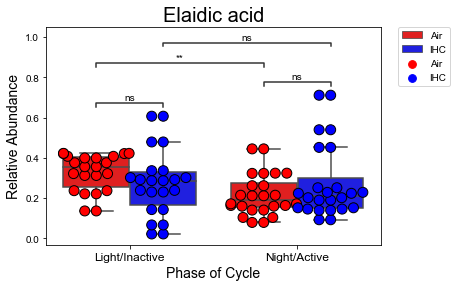

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.193e-01 U_stat=2.120e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.010e-02 U_stat=1.320e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=1.623e-01 U_stat=2.000e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=8.002e-01 U_stat=2.520e+02


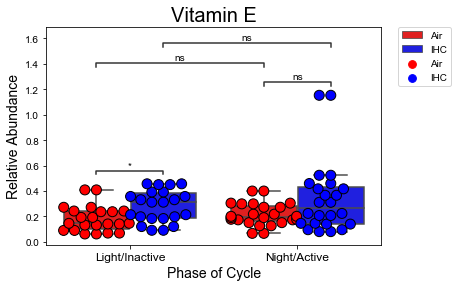

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=5.904e-02 U_stat=1.960e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.768e-01 U_stat=3.000e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=2.220e-01 U_stat=2.080e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.208e-04 U_stat=1.000e+02


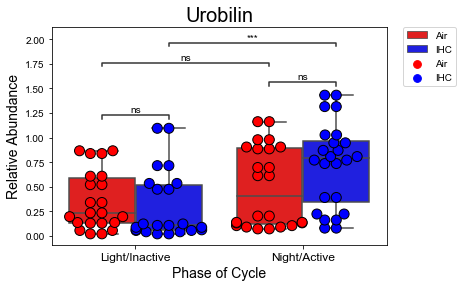

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_Air v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=6.278e-01 U_stat=2.640e+02
day_Air v.s. day_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=6.135e-01 U_stat=2.200e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=3.559e-02 U_stat=1.680e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.807e-03 U_stat=1.320e+02


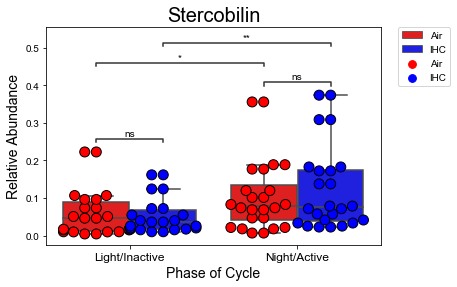

In [33]:
for ppc in other_mols:
    g = sns.boxplot(x="cycle", y=ppc, hue="exposure_type", 
                    palette=['red', 'blue'], data=metab_renamed2)
    g = sns.swarmplot(x="cycle", y=ppc, dodge=True, s=10, linewidth=1, edgecolor='k', 
                hue="exposure_type", palette=['red', 'blue'], data=metab_renamed2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    add_stat_annotation(g, data=metab_renamed2, x='cycle', y=ppc, hue="exposure_type", order=["day", "night"], 
                    box_pairs=[(('day', "Air"), ('day', "IHC")), 
                              (('night', "Air"), ('night', "IHC")), 
                               (('day', "Air"), ('night', "Air")), 
                               (('day', "IHC"), ('night', "IHC"))],
                    test='Mann-Whitney', loc='inside')
    plt.title(ppc, fontsize=20)
    plt.ylabel('Relative Abundance', fontsize=14)
    plt.xlabel('Phase of Cycle', fontsize=14)
    plt.xticks(np.arange(2), ('Light/Inactive', 'Night/Active'), fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('../figures/cIHC_ppc_box_%s.svg' % ppc, dpi=300, bbox_inches = "tight")
    plt.show()

In [34]:
for ppc in other_mols:
    FM = metab_renamed2[[ppc, 'exposure_type', 'cycle']].copy()
    print(ppc)
    for cyc in metab_renamed2.cycle.unique():
        TP = FM[FM["cycle"] == cyc]
        p = TP[TP['exposure_type'] == 'Air']
        q = TP[TP['exposure_type'] == 'IHC']
        x1 = p[ppc].values
        y1 = q[ppc].values
        w1, z1 = mannwhitneyu(x1, y1)
        print("phase", cyc, "Air vs IHC")
        print("p-value", z1)
    for exp in metab_renamed2.exposure_type.unique():
        EP = FM[FM["exposure_type"] == exp]
        r = EP[EP['cycle'] == 'day']
        s = EP[EP['cycle'] == 'night']
        x2 = r[ppc].values
        y2 = s[ppc].values
        w2, z2 = mannwhitneyu(x2, y2)
        print("exposure type", exp, "- day vs night")
        print("p-value", z2)
    print("___________________________")

Palmitoylcarnitine
phase day Air vs IHC
p-value 0.0066008013584642165
phase night Air vs IHC
p-value 0.008583239210326426
exposure type Air - day vs night
p-value 0.0330705265042435
exposure type IHC - day vs night
p-value 0.05781317316399907
___________________________
Oleoyl_L-carnitine
phase day Air vs IHC
p-value 0.001598663740728276
phase night Air vs IHC
p-value 0.09506382633470889
exposure type Air - day vs night
p-value 0.048314377924098185
exposure type IHC - day vs night
p-value 0.4001092810543897
___________________________
16:0_LysoPE
phase day Air vs IHC
p-value 0.014031882587476776
phase night Air vs IHC
p-value 0.4712150718204854
exposure type Air - day vs night
p-value 0.46930399419516894
exposure type IHC - day vs night
p-value 0.017797076854171836
___________________________
LysoPE_18:1-9Z_0:0
phase day Air vs IHC
p-value 7.418820215880775e-05
phase night Air vs IHC
p-value 0.40621955551673905
exposure type Air - day vs night
p-value 0.4001092810543897
exposure type I

In [35]:
FM2 = metab_renamed2[['murocholic acid', 'exposure_type', 'zt']].copy()
for time in list(metab_renamed2.zt.unique()):
        TP = FM2[FM2["zt"] == time]
        p = TP[TP['exposure_type'] == 'Air']
        q = TP[TP['exposure_type'] == 'IHC']
        x1 = p['murocholic acid'].values
        y1 = q['murocholic acid'].values
        w1, z1 = mannwhitneyu(x1, y1)
        print("ZT", time, "Air vs IHC")
        print("p-value", z1)
#Need Bonferroni Correction

ZT 10 Air vs IHC
p-value 0.0023121144007495617
ZT 6 Air vs IHC
p-value 0.3557825287247395
ZT 14 Air vs IHC
p-value 0.21408352566287575
ZT 2 Air vs IHC
p-value 0.0004376814674211777
ZT 22 Air vs IHC
p-value 0.019696235530803647
ZT 18 Air vs IHC
p-value 0.21408352566287575


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_Air v.s. 6_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.939e-02 U_stat=5.200e+01
2_Air v.s. 2_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=8.754e-04 U_stat=6.400e+01
10_Air v.s. 10_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.734e-01 U_stat=1.200e+01
14_Air v.s. 14_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=4.282e-01 U_stat=4.000e+01
18_Air v.s. 18_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=3.939e-02 U_stat=5.200e+01
22_Air v.s. 22_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=7.116e-01 U_stat=3.600e+01


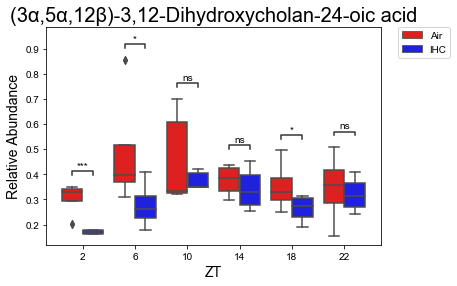

In [36]:
g = sns.boxplot(x="zt", y='(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid', hue="exposure_type", 
                    palette=['red', 'blue' ], data=metab_renamed2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
add_stat_annotation(g, data=metab_renamed2, x="zt", y='(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid', hue="exposure_type", hue_order=["Air", "IHC"], 
                    box_pairs=[((2, "Air"), (2, "IHC")), 
                               ((6, "Air"), (6, "IHC")), 
                               ((10, "Air"), (10, "IHC")), 
                               ((14, "Air"), (14, "IHC")), 
                               ((18, "Air"), (18, "IHC")), 
                               ((22, "Air"), (22, "IHC"))],
                    test='Mann-Whitney', text_format='star', loc='inside')
plt.title('(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid', fontsize=20)
plt.ylabel('Relative Abundance', fontsize=14)
plt.xlabel('ZT', fontsize=14)
#plt.xticks(np.arange(2), ('Light/Inactive', 'Night/Active'), fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/cIHC_BA_box_%s.svg' % BA, dpi=300, bbox_inches = "tight")
plt.show()

In [37]:
m = metab_renamed2[metab_renamed2['exposure_type'] == 'IHC']
m = m[m['cycle'] == 'day']
print(m['(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid'].values)

[0.35048064 0.40925553 0.28449144 0.17900521 0.281392   0.45298212
 0.42241044 0.37743678 0.34826036 0.25536925 0.24355773 0.35048064
 0.40925553 0.28449144 0.17900521 0.281392   0.45298212 0.42241044
 0.37743678 0.34826036 0.25536925 0.24355773]


In [38]:
n = metab_renamed2[metab_renamed2['exposure_type'] == 'IHC']
n = n[n['cycle'] == 'night']
print(n['(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid'].values)

[0.17751885 0.30471269 0.40725903 0.16157382 0.27788527 0.2438815
 0.31457874 0.35062289 0.19134886 0.16317605 0.17886318 0.24132868
 0.17751885 0.30471269 0.40725903 0.16157382 0.27788527 0.2438815
 0.31457874 0.35062289 0.19134886 0.16317605 0.17886318 0.24132868]


In [39]:
for BA in bile_acids:
    FM = metabs_merged[[BA, 'exposure_type', 'cycle']].copy()
    print(BA)
    for cond in [("Air", "IHC")]:
        A = FM[FM["exposure_type"] == cond[0]]
        I = FM[FM["exposure_type"] == cond[1]]
        CondA = A[BA].sum()
        CondI = I[BA].sum()
        print(cond[0], CondA)
        print(cond[1], CondI)
        
        if CondA > CondI:
            print("Highest is Air")
        else: 
            print("Highest is IHC")
    print("___________________________")

Deoxycholic acid
Air 83.03325571440956
IHC 139.3884840943124
Highest is IHC
___________________________
Tauro-b-muricholic acid
Air 2.9894203583642773
IHC 12.624084482507373
Highest is IHC
___________________________
Ursodeoxycholic acid
Air 0.5442995201533891
IHC 0.4273685409648932
Highest is Air
___________________________
Cholic acid
Air 4.465781773954264
IHC 13.69364880670188
Highest is IHC
___________________________
Hyodeoxycholic acid
Air 2.186629046089777
IHC 1.8330388768397494
Highest is Air
___________________________
CDCA
Air 0.14992599722520383
IHC 0.05733396786136035
Highest is Air
___________________________


In [42]:
for BA in bile_acids:
    FM = metabs_merged[[BA, 'exposure_type', 'mouse_number', 'cycle']].copy()
    print(BA)
    for cond in [("Air", "IHC")]:
        A = FM[FM["exposure_type"] == cond[0]]
        I = FM[FM["exposure_type"] == cond[1]]
        
        sums1 = []
        sums2 = []

        for mus1 in A.mouse_number.unique():
            MurineA = A[A['mouse_number'] == mus1]
            sums1.append(MurineA[BA].sum())
            
        for mus2 in I.mouse_number.unique():
            MurineI = I[I['mouse_number'] == mus2]
            sums2.append(MurineI[BA].sum())
        
    ww, zz = mannwhitneyu(sums1, sums2)
    print("p-value", zz)
        
    print("___________________________")

Deoxycholic acid
p-value 0.015191410988288745
___________________________
Tauro-b-muricholic acid
p-value 0.015191410988288745
___________________________
Ursodeoxycholic acid
p-value 0.33250277105101456
___________________________
Cholic acid
p-value 0.09696542614120535
___________________________
Hyodeoxycholic acid
p-value 0.33250277105101456
___________________________
CDCA
p-value 0.33250277105101456
___________________________


In [40]:
for ppc in other_mols:
    FM = metab_renamed2[[ppc, 'exposure_type', 'cycle']].copy()
    print(ppc)
    for cond in [("Air", "IHC")]:
        A = FM[FM["exposure_type"] == cond[0]]
        I = FM[FM["exposure_type"] == cond[1]]
        CondA = A[ppc].sum()
        CondI = I[ppc].sum()
        print(cond[0], CondA)
        print(cond[1], CondI)
        
        if CondA > CondI:
            print("Highest is Air")
        else: 
            print("Highest is IHC")
    print("___________________________")

Palmitoylcarnitine
Air 39.056836696000005
IHC 26.861912244000003
Highest is Air
___________________________
Oleoyl_L-carnitine
Air 23.936431884
IHC 18.664217784
Highest is Air
___________________________
16:0_LysoPE
Air 4.549889344
IHC 5.562174264
Highest is IHC
___________________________
LysoPE_18:1-9Z_0:0
Air 1.994045778
IHC 2.7497130999999997
Highest is IHC
___________________________
PC_18:0_14:0
Air 15.252354438
IHC 17.967942889999996
Highest is IHC
___________________________
PC_10:0_10:0
Air 14.687877870000001
IHC 22.683947604
Highest is IHC
___________________________
LPC_P-16:0
Air 3.593603172
IHC 5.472978974000001
Highest is IHC
___________________________
PC_O-16:0_18:1
Air 1.006364376
IHC 1.9259188299999996
Highest is IHC
___________________________
PC_17:1_0:0
Air 13.073820994000002
IHC 22.316048156
Highest is IHC
___________________________
LPC_P-16:0
Air 3.593603172
IHC 5.472978974000001
Highest is IHC
___________________________
LPC_O-16:0
Air 0.05630455599999999
IHC 0

In [41]:
for ppc in other_mols:
    FM = metab_renamed2[[ppc, 'exposure_type', 'mouse_number', 'cycle']].copy()
    print(ppc)
    for cond in [("Air", "IHC")]:
        A = FM[FM["exposure_type"] == cond[0]]
        I = FM[FM["exposure_type"] == cond[1]]
        
        sums1 = []
        sums2 = []

        for mus1 in A.mouse_number.unique():
            MurineA = A[A['mouse_number'] == mus1]
            sums1.append(MurineA[ppc].sum())
            
        for mus2 in I.mouse_number.unique():
            MurineI = I[I['mouse_number'] == mus2]
            sums2.append(MurineI[ppc].sum())
        
    ww, zz = mannwhitneyu(sums1, sums2)
    print("p-value", zz)
        
    print("___________________________")

Palmitoylcarnitine
p-value 0.156160710838108
___________________________
Oleoyl_L-carnitine
p-value 0.156160710838108
___________________________
16:0_LysoPE
p-value 0.156160710838108
___________________________
LysoPE_18:1-9Z_0:0
p-value 0.09696542614120535
___________________________
PC_18:0_14:0
p-value 0.156160710838108
___________________________
PC_10:0_10:0
p-value 0.156160710838108
___________________________
LPC_P-16:0
p-value 0.156160710838108
___________________________
PC_O-16:0_18:1
p-value 0.156160710838108
___________________________
PC_17:1_0:0
p-value 0.015191410988288745
___________________________
LPC_P-16:0
p-value 0.156160710838108
___________________________
LPC_O-16:0
p-value 0.056175598845231926
___________________________
(3α,5β,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid
p-value 0.23524321102939483
___________________________
(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid
p-value 0.030300984856003035
___________________________
murocholic acid
p-value 0.0